In [12]:
%%capture --no-display

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

dataset_path = '../data/raw/emendas.json'

with open(dataset_path) as file_data:
    data = json.load(file_data)['data']
    df = pd.DataFrame(data)


# Convertendo colunas de valores para o dtype correto
value_columns = [
    'valorEmpenhado',
    'valorLiquidado',
    'valorPago',
    'valorRestoInscrito',
    'valorRestoCancelado',
    'valorRestoPago',
    'valorRestoAPagar',
]
for column in value_columns:
    df[column] = df[column].str.replace('.', '').str.replace(',', '.')    
    
value_dtypes_dict = { col:'float' for col in value_columns }

df = df.astype(value_dtypes_dict)

In [13]:
# Sumarização do dataset
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codigoEmenda         432 non-null    object 
 1   ano                  432 non-null    object 
 2   autor                432 non-null    object 
 3   nomeAutor            0 non-null      object 
 4   numeroEmenda         432 non-null    object 
 5   localidadeDoGasto    432 non-null    object 
 6   funcao               432 non-null    object 
 7   subfuncao            432 non-null    object 
 8   valorEmpenhado       432 non-null    float64
 9   valorLiquidado       432 non-null    float64
 10  valorPago            432 non-null    float64
 11  valorRestoInscrito   432 non-null    float64
 12  valorRestoCancelado  432 non-null    float64
 13  valorRestoPago       432 non-null    float64
 14  valorRestoAPagar     432 non-null    float64
dtypes: float64(7), object(8)
memory usage: 5

,codigoEmenda,ano,autor,nomeAutor,numeroEmenda,localidadeDoGasto,funcao,subfuncao,valorEmpenhado,valorLiquidado,valorPago,valorRestoInscrito,valorRestoCancelado,valorRestoPago,valorRestoAPagar
365,202081000188,2020,RELATOR GERAL,None,0188,Nacional,Organização agrária,Ensino profissional,"1,869,327.78","752,211.67","710,625.67","261,704.00","105,935.87","903,473.77","410,996.47"
390,202081001588,2020,RELATOR GERAL,None,1588,Nacional,Cultura,"Patrimônio histórico, artístico e arqueológico","597,466.06","597,466.06","597,466.06",0.00,0.00,0.00,0.00
279,202081001590,2020,RELATOR GERAL,None,1590,Nacional,Cultura,Difusão cultural,"6,963,256.73","5,886,298.53","5,861,046.82","18,745.94","10,847.86","1,083,463.97","26,644.02"
280,202081001612,2020,RELATOR GERAL,None,1612,Nacional,Administração,Normatização e fiscalização,"6,890,067.72",0.00,0.00,"30,693.57",0.00,"6,873,922.77","46,838.52"
38,202081001613,2020,RELATOR GERAL,None,1613,Nacional,Urbanismo,Assistência comunitária,"196,154,372.14",0.00,0.00,"141,040,783.88","3,293,553.06","109,040,768.00","224,860,834.96"


/tmp/ipykernel_396/2475130376.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 40000000.0, '40,000,000'),
 Text(0, 60000000.0, '60,000,000'),
 Text(0, 80000000.0, '80,000,000'),
 Text(0, 100000000.0, '100,000,000'),
 Text(0, 120000000.0, '120,000,000'),
 Text(0, 140000000.0, '140,000,000'),
 Text(0, 160000000.0, '160,000,000')]

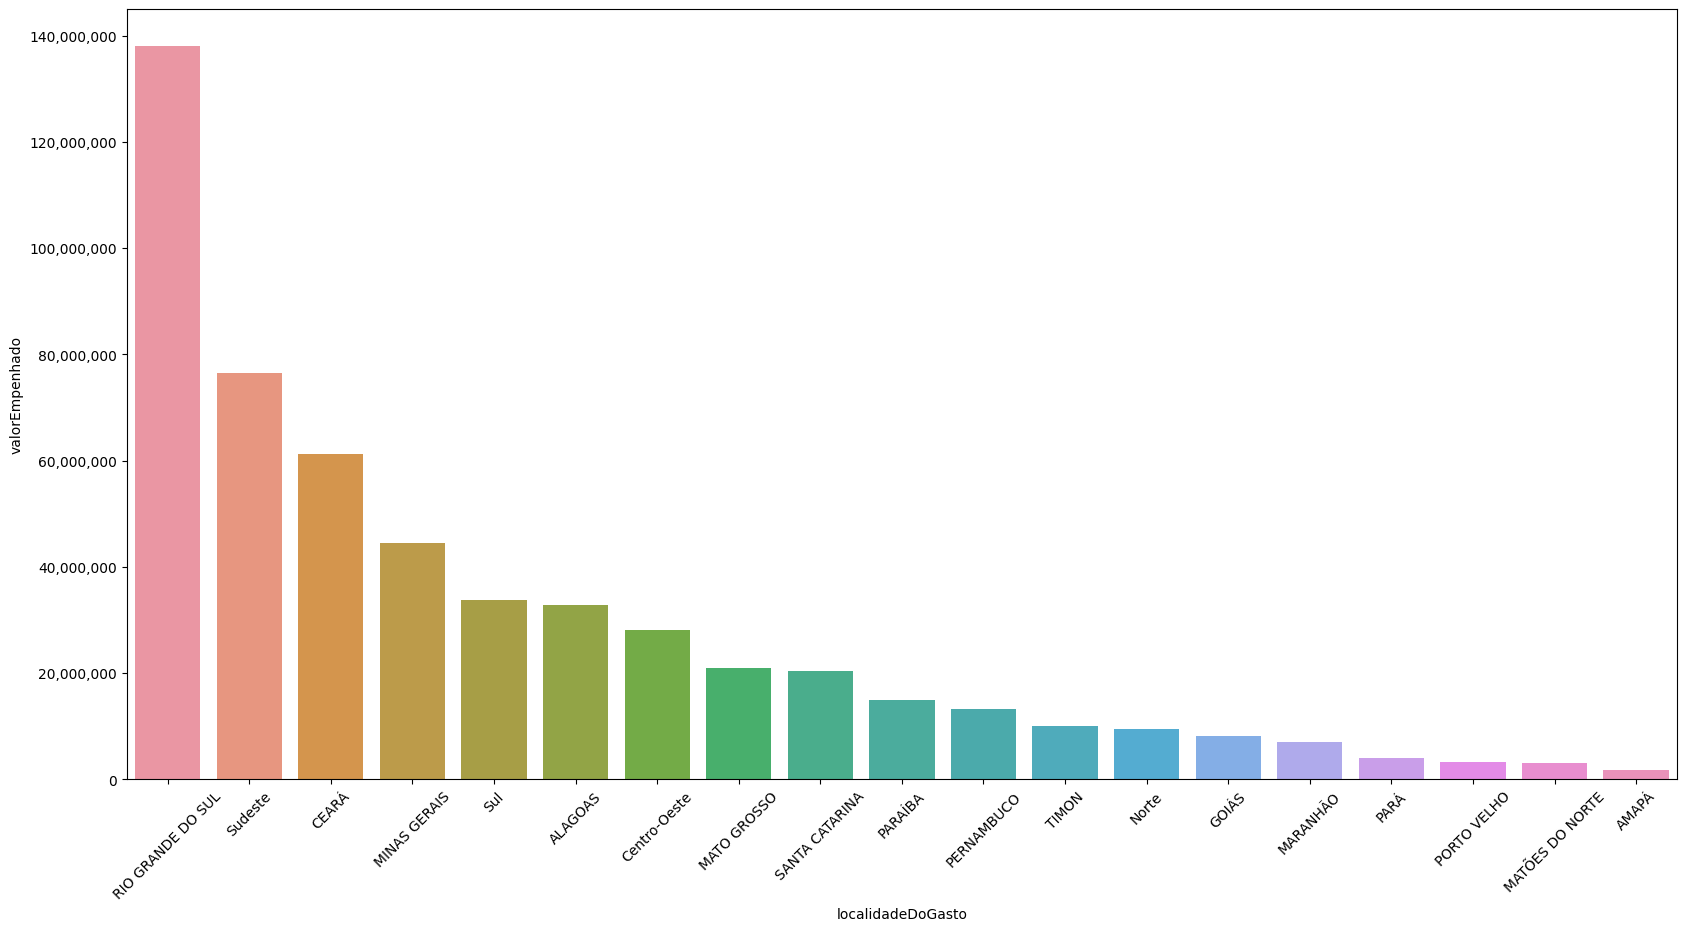

In [208]:
# Agrupando valorEmpenhado por localidade
loc_df = df.groupby('localidadeDoGasto')[['valorPago', 'valorEmpenhado', 'valorLiquidado']].sum()

loc_df = loc_df.drop(['Nacional', 'Nordeste'])  # Removendo outlier
loc_df = loc_df.sort_values('valorEmpenhado', ascending=False)

# Redefinindo parametros do matplotlib para melhorar legibilidade do gráfico
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

sns.barplot(
    x=loc_df.index,
    y=loc_df.valorEmpenhado,
)

# Formatting y-axis ticks with thousands separator
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

/tmp/ipykernel_396/3261978520.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 40000000.0, '40,000,000'),
 Text(0, 60000000.0, '60,000,000'),
 Text(0, 80000000.0, '80,000,000'),
 Text(0, 100000000.0, '100,000,000'),
 Text(0, 120000000.0, '120,000,000'),
 Text(0, 140000000.0, '140,000,000'),
 Text(0, 160000000.0, '160,000,000')]

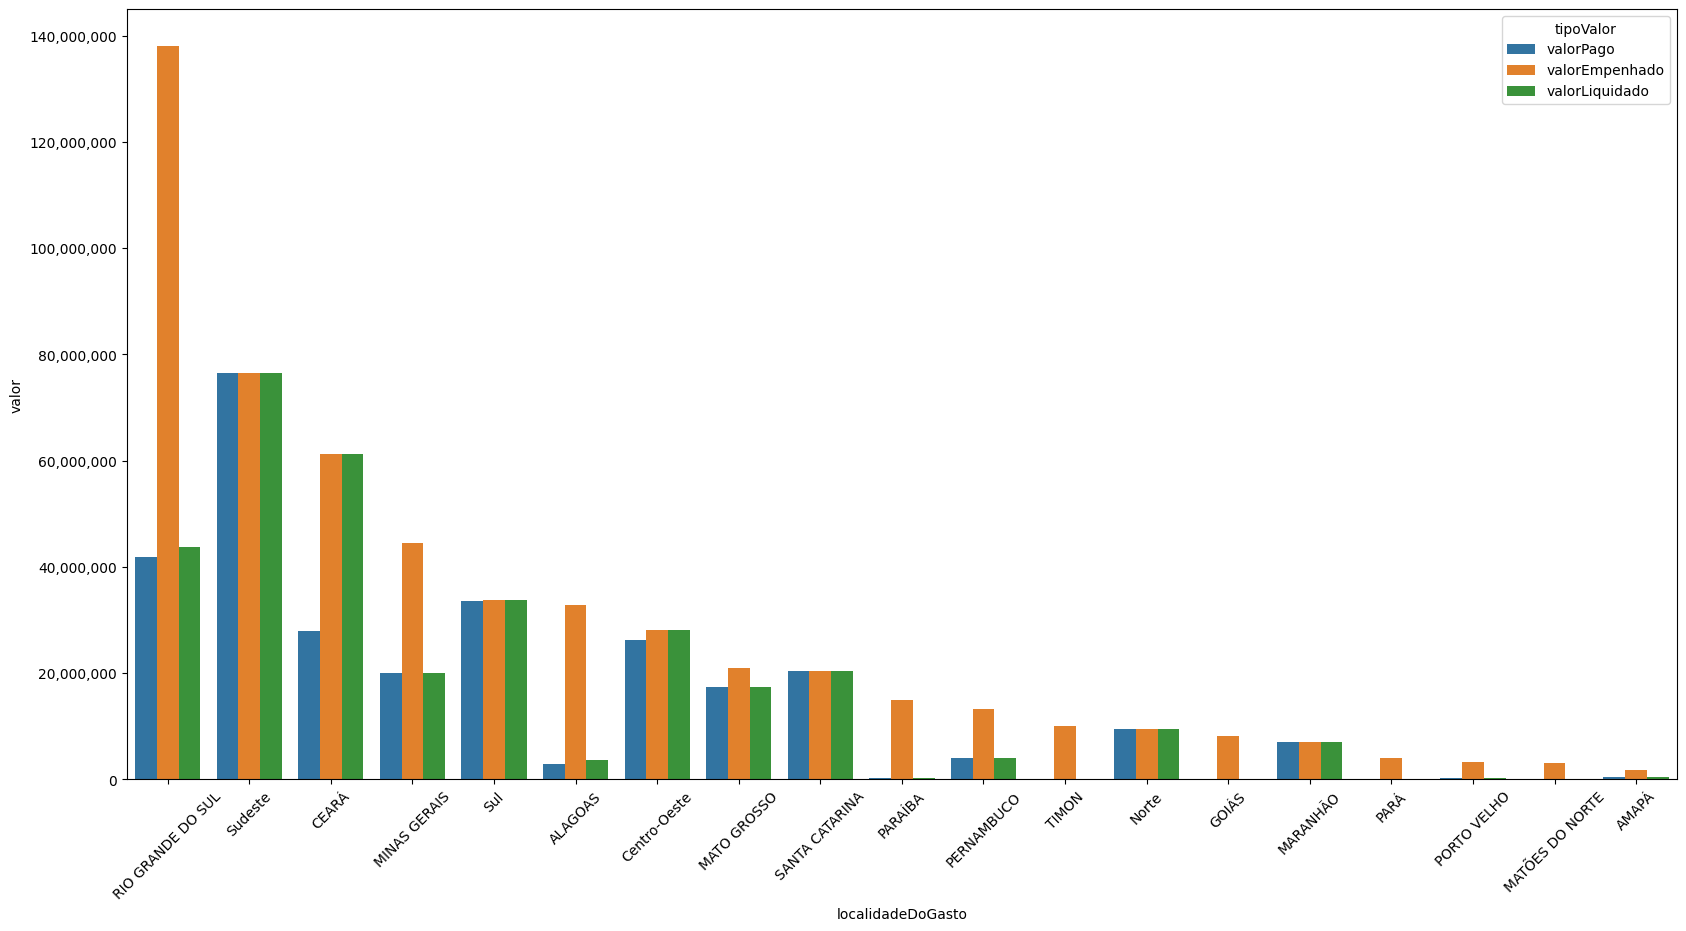

In [207]:
# Agrupando valores por localidade
loc_df = df.groupby('localidadeDoGasto')[['valorPago', 'valorEmpenhado', 'valorLiquidado']].sum()

# Removendo outliers
loc_df = loc_df.drop(['Nacional', 'Nordeste'])

# Reorganizando dados
loc_df = loc_df.sort_values('valorEmpenhado', ascending=False)
loc_df = loc_df.reset_index()
loc_df = pd.melt(
    loc_df,
    id_vars=['localidadeDoGasto'],
    value_vars=['valorPago', 'valorEmpenhado', 'valorLiquidado'],
    var_name='tipoValor',
    value_name='valor'
)

# Redefinindo parametros do matplotlib para melhorar legibilidade do gráfico
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

sns.barplot(
    x=loc_df.localidadeDoGasto,
    y=loc_df.valor,
    hue=loc_df.tipoValor,
)

# Formatting y-axis ticks with thousands separator
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

/tmp/ipykernel_396/1534042192.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 4000000000.0, '4,000,000,000'),
 Text(0, 6000000000.0, '6,000,000,000'),
 Text(0, 8000000000.0, '8,000,000,000'),
 Text(0, 10000000000.0, '10,000,000,000'),
 Text(0, 12000000000.0, '12,000,000,000'),
 Text(0, 14000000000.0, '14,000,000,000'),
 Text(0, 16000000000.0, '16,000,000,000'),
 Text(0, 18000000000.0, '18,000,000,000'),
 Text(0, 20000000000.0, '20,000,000,000'),
 Text(0, 22000000000.0, '22,000,000,000')]

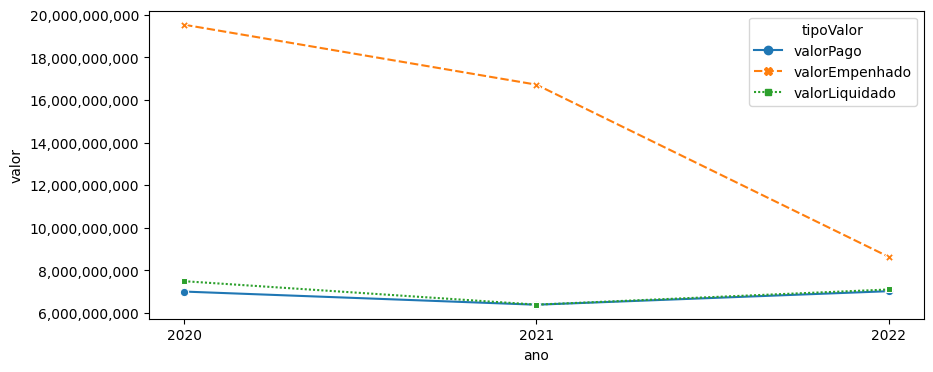

In [209]:
# Agrupando valores por ano
year_df = df.groupby('ano')[['valorPago', 'valorEmpenhado', 'valorLiquidado']].sum()

# Reorganizando dados
year_df = year_df.reset_index()
year_df = pd.melt(
    year_df,
    id_vars=['ano'],
    value_vars=['valorPago', 'valorEmpenhado', 'valorLiquidado'],
    var_name='tipoValor',
    value_name='valor'
)

plt.figure(figsize=(10, 4))

sns.lineplot(
    x=year_df.ano,
    y=year_df.valor,
    hue=year_df.tipoValor,
    style=year_df.tipoValor,
    markers=True
)

# Formatting y-axis ticks with thousands separator
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])